In [1]:
import numpy as np
import pandas as pd
import pickle as pl
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau, pearsonr
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import defaultdict
from scipy.stats import skew

In [2]:
%matplotlib inline
#%matplotlib qt

In [3]:
def load_data(path):
    methods = ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]
    Ks = np.load("results/" + path + "/K.npy")
    
    neighborhood_size_q = dict()
    rating_overlap_q = dict()
    mean_absolute_error = dict()
    privacy_risk_dp = dict()
    privacy_risk_dp_secures = dict()
    frac_vulnerables = dict()
    recommendation_frequency = dict()
    for m in methods:
        neighborhood_size_q[m] = np.load("results/" + path + "/neighborhood_size_q_" + m + ".npy")
        rating_overlap_q[m] = np.load("results/" + path + "/rating_overlap_q_" + m + ".npy")
        mean_absolute_error[m] = np.load("results/" + path + "/mae_" + m + ".npy")
        privacy_risk_dp[m] = np.load("results/" + path + "/privacy_risk_dp_" + m + ".npy")
        privacy_risk_dp_secures[m] = np.load("results/" + path + "/privacy_risk_dp_secures_" + m + ".npy")
        frac_vulnerables[m] = np.load("results/" + path + "/fraction_vulnerables_" + m + ".npy")
        
        recommendation_frequency[m] = pl.load(open("results/" + path + "/recommendation_frequency_" + m + ".pkl", "rb"))
        
    return {"K": Ks,
            "neighborhood_size_q": neighborhood_size_q, 
            "rating_overlap_q": rating_overlap_q, 
            "mae": mean_absolute_error, 
            "privacy_risk_dp": privacy_risk_dp, 
            "privacy_risk_dp_secures": privacy_risk_dp_secures, 
            "fraction_vulnerables": frac_vulnerables,
            "recommendation_frequency": recommendation_frequency}

def load_data_dp(path):
    methods = ["userknn", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse", "userknn_no", "userknn_full"]
    
    Ks = np.load("results/" + path + "/K.npy")
    
    mean_absolute_error = dict()
    ndcg = dict()
    privacy_risk_dp = dict()
    privacy_risk_dp_secures = dict()
    frac_vulnerables = dict()
    recommendation_frequency = dict()
    for m in methods:
        ndcg[m] = np.load("results/" + path + "/ndcg_" + m + ".npy")
        mean_absolute_error[m] = np.load("results/" + path + "/mae_" + m + ".npy")
        privacy_risk_dp[m] = np.load("results/" + path + "/privacy_risk_dp_" + m + ".npy")
        privacy_risk_dp_secures[m] = np.load("results/" + path + "/privacy_risk_dp_secures_" + m + ".npy")
        frac_vulnerables[m] = np.load("results/" + path + "/fraction_vulnerables_" + m + ".npy")
        
        recommendation_frequency[m] = pl.load(open("results/" + path + "/recommendation_frequency_" + m + ".pkl", "rb"))
    
    return {"K": Ks,
            "mae": mean_absolute_error, 
            "ndcg": ndcg,
            "privacy_risk_dp": privacy_risk_dp, 
            "privacy_risk_dp_secures": privacy_risk_dp_secures, 
            "fraction_vulnerables": frac_vulnerables,
            "recommendation_frequency": recommendation_frequency}

In [6]:
#ml1m = load_data(path="unprotected/ml-1m")
douban = load_data(path="unprotected/douban")
lfm = load_data(path="unprotected/lfm")
ciao = load_data(path="unprotected/ciao")
goodreads = load_data(path="unprotected/goodreads")

#ml1m_dp = load_data_dp(path="protected/ml-1m")
douban_dp = load_data_dp(path="protected/douban")
lfm_dp = load_data_dp(path="protected/lfm")
ciao_dp = load_data_dp(path="protected/ciao")
#goodreads_dp = load_data_dp(path="protected/goodreads")

ml1m = load_data(path="unprotected/ml-100k")
ml1m_dp = load_data(path="protected/ml-100k")

# Neighborhood Size

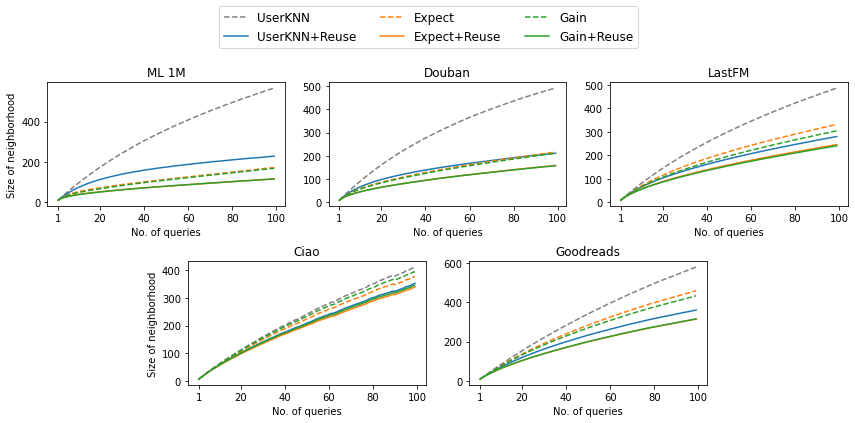

In [7]:
def plot(ax, data, k_idx=0, n_queries=100): 
    ax.plot(range(1, n_queries), data["userknn"][k_idx][1:n_queries], color="gray", linestyle="dashed", alpha=1)
    ax.plot(range(1, n_queries), data["userknn_reuse"][k_idx][1:n_queries], color="C0", linestyle="solid")
    ax.plot(range(1, n_queries), data["expect"][k_idx][1:n_queries], color="C1", linestyle="dashed", alpha=1)
    ax.plot(range(1, n_queries), data["expect_reuse"][k_idx][1:n_queries], color="C1", linestyle="solid")
    ax.plot(range(1, n_queries), data["gain"][k_idx][1:n_queries], color="C2", linestyle="dashed", alpha=1)    
    ax.plot(range(1, n_queries), data["gain_reuse"][k_idx][1:n_queries], color="C2", linestyle="solid")

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axes = [ax1, ax2, ax3, ax4, ax5]

plot(axes[0], ml1m["neighborhood_size_q"])
plot(axes[1], douban["neighborhood_size_q"])
plot(axes[2], lfm["neighborhood_size_q"])
plot(axes[3], ciao["neighborhood_size_q"])
plot(axes[4], goodreads["neighborhood_size_q"])

axes[0].set_ylabel("Size of neighborhood")
axes[3].set_ylabel("Size of neighborhood")

axes[0].set_xlabel("No. of queries")
axes[1].set_xlabel("No. of queries")
axes[2].set_xlabel("No. of queries")
axes[3].set_xlabel("No. of queries")
axes[4].set_xlabel("No. of queries")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
axes[2].set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

axes[0].set_xticks([1, 20, 40, 60, 80, 100])
axes[1].set_xticks([1, 20, 40, 60, 80, 100])
axes[2].set_xticks([1, 20, 40, 60, 80, 100])
axes[3].set_xticks([1, 20, 40, 60, 80, 100])
axes[4].set_xticks([1, 20, 40, 60, 80, 100])

lines = []
lines.append(Line2D([0], [0], color="gray", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C0", linestyle="solid"))
lines.append(Line2D([0], [0], color="C1", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C1", linestyle="solid"))
lines.append(Line2D([0], [0], color="C2", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C2", linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Expect", "Expect+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

# Rating Overlap

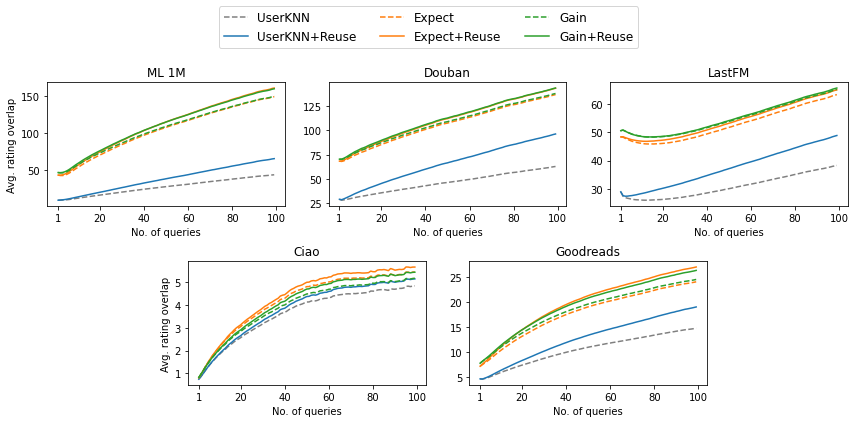

In [8]:
def plot(ax, data, k_idx=0, n_queries=100): 
    ax.plot(range(1, n_queries), data["userknn"][k_idx][1:n_queries], color="gray", linestyle="dashed", alpha=1)
    ax.plot(range(1, n_queries), data["userknn_reuse"][k_idx][1:n_queries], color="C0", linestyle="solid")
    ax.plot(range(1, n_queries), data["expect"][k_idx][1:n_queries], color="C1", linestyle="dashed", alpha=1)
    ax.plot(range(1, n_queries), data["expect_reuse"][k_idx][1:n_queries], color="C1", linestyle="solid")
    ax.plot(range(1, n_queries), data["gain"][k_idx][1:n_queries], color="C2", linestyle="dashed", alpha=1)    
    ax.plot(range(1, n_queries), data["gain_reuse"][k_idx][1:n_queries], color="C2", linestyle="solid")

    
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axes = [ax1, ax2, ax3, ax4, ax5]

plot(axes[0], ml1m["rating_overlap_q"])
plot(axes[1], douban["rating_overlap_q"])
plot(axes[2], lfm["rating_overlap_q"])
plot(axes[3], ciao["rating_overlap_q"])
plot(axes[4], goodreads["rating_overlap_q"])

axes[0].set_ylabel("Avg. rating overlap")
axes[3].set_ylabel("Avg. rating overlap")

axes[0].set_xlabel("No. of queries")
axes[1].set_xlabel("No. of queries")
axes[2].set_xlabel("No. of queries")
axes[3].set_xlabel("No. of queries")
axes[4].set_xlabel("No. of queries")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
axes[2].set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

axes[0].set_xticks([1, 20, 40, 60, 80, 100])
axes[1].set_xticks([1, 20, 40, 60, 80, 100])
axes[2].set_xticks([1, 20, 40, 60, 80, 100])
axes[3].set_xticks([1, 20, 40, 60, 80, 100])
axes[4].set_xticks([1, 20, 40, 60, 80, 100])

lines = []
lines.append(Line2D([0], [0], color="gray", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C0", linestyle="solid"))
lines.append(Line2D([0], [0], color="C1", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C1", linestyle="solid"))
lines.append(Line2D([0], [0], color="C2", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C2", linestyle="solid"))

fig.legend(lines, labels, ncol=3, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

# Accuracy w\o DP

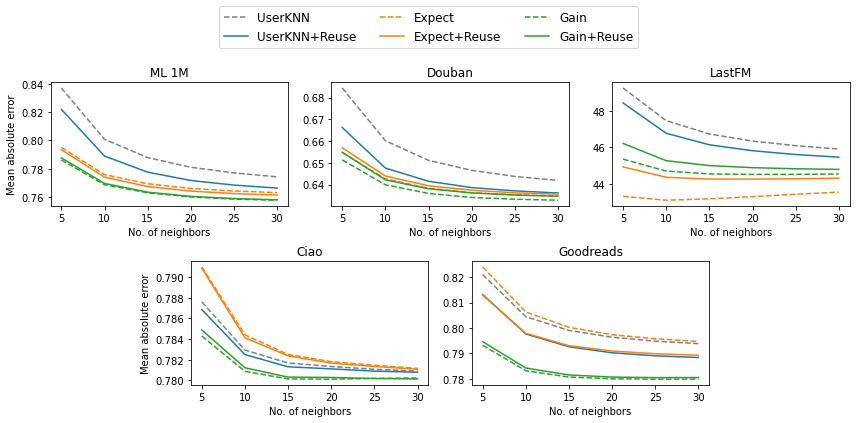

In [9]:
def plot(ax, data, K): 
    ax.plot(K, data["userknn"], color="gray", linestyle="dashed", alpha=1)
    ax.plot(K, data["userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(K, data["expect"], color="C1", linestyle="dashed", alpha=1)
    ax.plot(K, data["expect_reuse"], color="C1", linestyle="solid")
    ax.plot(K, data["gain"], color="C2", linestyle="dashed", alpha=1)    
    ax.plot(K, data["gain_reuse"], color="C2", linestyle="solid")
    
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axes = [ax1, ax2, ax3, ax4, ax5]

plot(axes[0], ml1m["mae"], K=ml1m["K"])
plot(axes[1], douban["mae"], K=douban["K"])
plot(axes[2], lfm["mae"], K=lfm["K"])
plot(axes[3], ciao["mae"], K=ciao["K"])
plot(axes[4], goodreads["mae"], K=goodreads["K"])

axes[0].set_ylabel("Mean absolute error")
axes[3].set_ylabel("Mean absolute error")

axes[0].set_xlabel("No. of neighbors")
axes[1].set_xlabel("No. of neighbors")
axes[2].set_xlabel("No. of neighbors")
axes[3].set_xlabel("No. of neighbors")
axes[4].set_xlabel("No. of neighbors")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
axes[2].set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

lines = []
lines.append(Line2D([0], [0], color="gray", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C0", linestyle="solid"))
lines.append(Line2D([0], [0], color="C1", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C1", linestyle="solid"))
lines.append(Line2D([0], [0], color="C2", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C2", linestyle="solid"))

fig.legend(lines, labels, ncol=3, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

# Fraction of Vulnerables

In [10]:
def print_frac_vulnerables(data, k_idx=1):
    print("UserKNN: %.2f" % (data["userknn"][k_idx] * 100))
    print("UserKNN+Reuse: %.2f" % (data["userknn_reuse"][k_idx] * 100))

    print("Expect: %.2f" % (data["expect"][k_idx] * 100))
    print("Expect+Reuse: %.2f" % (data["expect_reuse"][k_idx] * 100))

    print("Gain: %.2f" % (data["gain"][k_idx] * 100))
    print("Gain+Reuse: %.2f" % (data["gain_reuse"][k_idx] * 100))

print("=== MovieLens 1M ===")
print_frac_vulnerables(ml1m["fraction_vulnerables"], k_idx=1)
print()

print("=== Douban ===")
print_frac_vulnerables(douban["fraction_vulnerables"], k_idx=1)
print()

print("=== LastFM ===")
print_frac_vulnerables(lfm["fraction_vulnerables"], k_idx=1)
print()

print("=== Ciao ===")
print_frac_vulnerables(ciao["fraction_vulnerables"], k_idx=1)
print()

print("=== Goodreads ===")
print_frac_vulnerables(goodreads["fraction_vulnerables"], k_idx=1)
print()

=== MovieLens 1M ===
UserKNN: 80.39
UserKNN+Reuse: 84.64
Expect: 24.13
Expect+Reuse: 25.11
Gain: 25.09
Gain+Reuse: 27.61

=== Douban ===
UserKNN: 96.68
UserKNN+Reuse: 87.37
Expect: 34.40
Expect+Reuse: 41.59
Gain: 37.43
Gain+Reuse: 43.92

=== LastFM ===
UserKNN: 99.89
UserKNN+Reuse: 98.90
Expect: 68.20
Expect+Reuse: 78.85
Gain: 80.28
Gain+Reuse: 84.27

=== Ciao ===
UserKNN: 8.02
UserKNN+Reuse: 7.91
Expect: 7.88
Expect+Reuse: 7.77
Gain: 8.19
Gain+Reuse: 7.98

=== Goodreads ===
UserKNN: 65.00
UserKNN+Reuse: 52.29
Expect: 29.12
Expect+Reuse: 28.22
Gain: 40.51
Gain+Reuse: 37.22



# Accuracy w\ DP

NameError: name 'goodreads_dp' is not defined

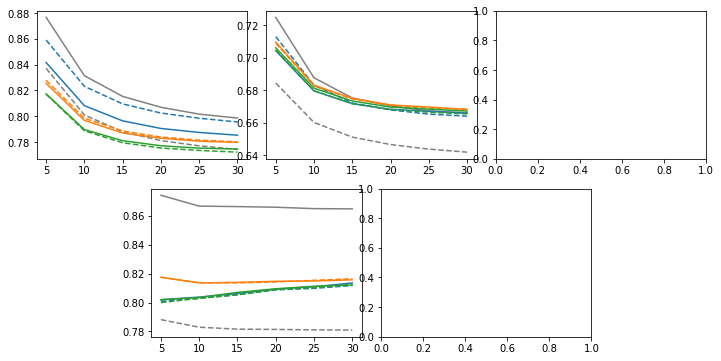

In [11]:
def plot(ax, data, K): 
    ax.plot(K, data["userknn_no"], color="gray", linestyle="dashed")
    ax.plot(K, data["userknn_full"], color="gray", linestyle="solid")
    ax.plot(K, data["userknn"], color="C0", linestyle="dashed", alpha=1)
    ax.plot(K, data["userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(K, data["expect"], color="C1", linestyle="dashed", alpha=1)
    ax.plot(K, data["expect_reuse"], color="C1", linestyle="solid")
    ax.plot(K, data["gain"], color="C2", linestyle="dashed", alpha=1)    
    ax.plot(K, data["gain_reuse"], color="C2", linestyle="solid")

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, fig=fig)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2, fig=fig)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, fig=fig)
axes = [ax1, ax2, ax3, ax4, ax5]

plot(axes[0], ml1m_dp["mae"], K=ml1m_dp["K"])
plot(axes[1], douban_dp["mae"], K=douban_dp["K"])
plot(axes[3], ciao_dp["mae"], K=ciao_dp["K"])
plot(axes[4], goodreads_dp["mae"], K=goodreads_dp["K"])

ax = axes[2]
divider = make_axes_locatable(ax)
ax_top = divider.new_vertical(size="400%", pad=0.05)
fig.add_axes(ax_top)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["userknn_full"], color="gray", linestyle="solid", alpha=1)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["userknn"], color="C0", linestyle="dashed", alpha=1)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["expect"], color="C1", linestyle="dashed", alpha=1)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["gain"], color="C2", linestyle="dashed", alpha=1)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["userknn_reuse"], color="C0", linestyle="solid")
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["expect_reuse"], color="C1", linestyle="solid")
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["gain_reuse"], color="C2", linestyle="solid")
ax.plot(lfm_dp["K"], lfm_dp["mae"]["userknn_no"], color="gray", linestyle="dashed", alpha=1)
ax.spines['top'].set_visible(False)
ax.set_ylim(44.2, 52)
ax_top.set_ylim(105.5, 134.5)
ax_top.tick_params(bottom=False, labelbottom=False)
ax_top.spines['bottom'].set_visible(False)
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)

axes[0].set_ylabel("Mean absolute error")
axes[3].set_ylabel("Mean absolute error")

axes[0].set_xlabel("No. of neighbors")
axes[1].set_xlabel("No. of neighbors")
axes[2].set_xlabel("No. of neighbors")
axes[3].set_xlabel("No. of neighbors")
axes[4].set_xlabel("No. of neighbors")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
ax_top.set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")


lines = []
lines.append(Line2D([0], [0], color="gray", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="gray", linestyle='solid'))
lines.append(Line2D([0], [0], color="C0", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C0", linestyle="solid"))
lines.append(Line2D([0], [0], color="C1", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C1", linestyle="solid"))
lines.append(Line2D([0], [0], color="C2", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C2", linestyle="solid"))


"""colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))"""
labels = ["UserKNN", r"Full$_{DP}$", r"UserKNN$_{DP}$", r"UserKNN+Reuse$_{DP}$", r"Expect$_{DP}$", r"Expect+Reuse$_{DP}$", r"Gain$_{DP}$", r"Gain+Reuse$_{DP}$"]

fig.legend(lines, labels, ncol=4, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

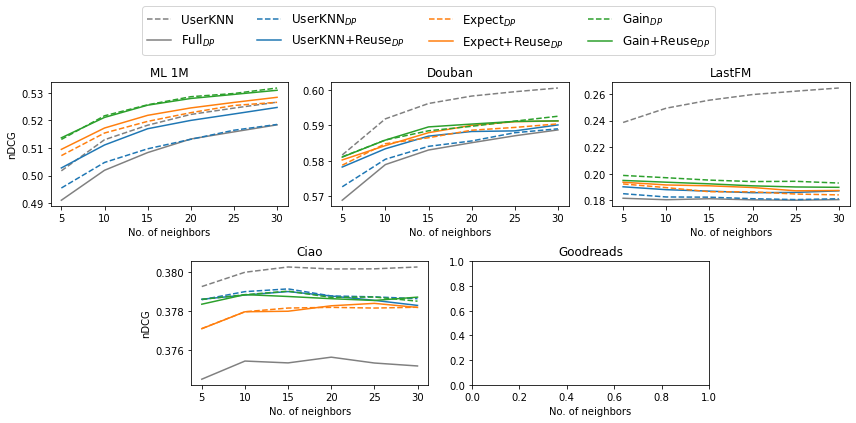

In [13]:
def plot(ax, data, K): 
    ax.plot(K, data["userknn_no"], color="gray", linestyle="dashed")
    ax.plot(K, data["userknn_full"], color="gray", linestyle="solid")
    ax.plot(K, data["userknn"], color="C0", linestyle="dashed", alpha=1)
    ax.plot(K, data["userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(K, data["expect"], color="C1", linestyle="dashed", alpha=1)
    ax.plot(K, data["expect_reuse"], color="C1", linestyle="solid")
    ax.plot(K, data["gain"], color="C2", linestyle="dashed", alpha=1)    
    ax.plot(K, data["gain_reuse"], color="C2", linestyle="solid")

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, fig=fig)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2, fig=fig)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, fig=fig)
axes = [ax1, ax2, ax3, ax4, ax5]

plot(axes[0], ml1m_dp["ndcg"], K=ml1m_dp["K"])
plot(axes[1], douban_dp["ndcg"], K=douban_dp["K"])
plot(axes[2], lfm_dp["ndcg"], K=lfm_dp["K"])
plot(axes[3], ciao_dp["ndcg"], K=ciao_dp["K"])
#plot(axes[4], goodreads_dp["ndcg"], K=goodreads_dp["K"])

axes[0].set_ylabel("nDCG")
axes[3].set_ylabel("nDCG")

axes[0].set_xlabel("No. of neighbors")
axes[1].set_xlabel("No. of neighbors")
axes[2].set_xlabel("No. of neighbors")
axes[3].set_xlabel("No. of neighbors")
axes[4].set_xlabel("No. of neighbors")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
axes[2].set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

lines = []
lines.append(Line2D([0], [0], color="gray", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="gray", linestyle='solid'))
lines.append(Line2D([0], [0], color="C0", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C0", linestyle="solid"))
lines.append(Line2D([0], [0], color="C1", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C1", linestyle="solid"))
lines.append(Line2D([0], [0], color="C2", linestyle='dashed', alpha=1))
lines.append(Line2D([0], [0], color="C2", linestyle="solid"))


"""colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))"""
labels = ["UserKNN", r"Full$_{DP}$", r"UserKNN$_{DP}$", r"UserKNN+Reuse$_{DP}$", r"Expect$_{DP}$", r"Expect+Reuse$_{DP}$", r"Gain$_{DP}$", r"Gain+Reuse$_{DP}$"]

fig.legend(lines, labels, ncol=4, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

# Privacy Risk w\ DP

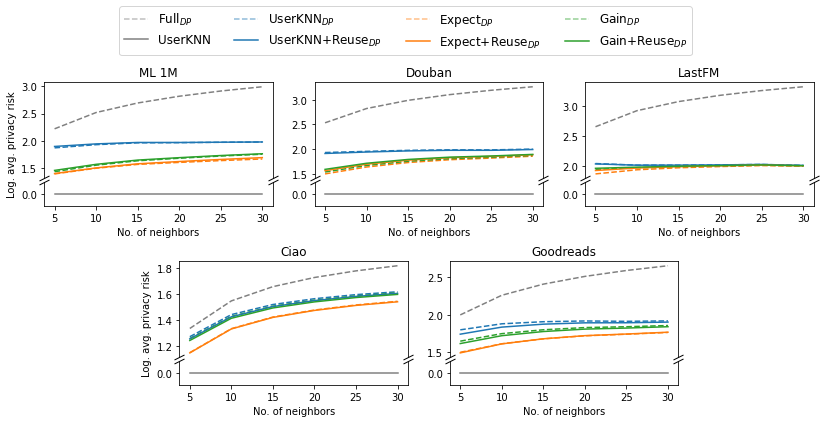

In [10]:
def plot(ax, data, K): 
    def split_axis(ax):
        divider = make_axes_locatable(ax)
        ax_top = divider.new_vertical(size="400%", pad=0.05)
        
        fig.add_axes(ax_top)
        ax.spines['top'].set_visible(False)
        ax_top.tick_params(bottom=False, labelbottom=False)
        ax_top.spines['bottom'].set_visible(False)
        
        ax_top.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        d = .5
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
        ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)
        ax.set_yticks([0.0])
        
        return ax_top, ax
    
    ax_top, ax_bottom = split_axis(ax)
    #ax_top.plot(K, np.log10(data["userknn_full"]), color="gray", linestyle="solid", alpha=0.75, linewidth=1)
    ax_top.plot(K, np.log10(data["userknn"]), color="C0", linestyle="dashed", alpha=1)
    ax_top.plot(K, np.log10(data["expect"]), color="C1", linestyle="dashed", alpha=1)
    ax_top.plot(K, np.log10(data["gain"]), color="C2", linestyle="dashed", alpha=1)
    ax_top.plot(K, np.log10(data["userknn_reuse"]), color="C0", linestyle="solid")
    ax_top.plot(K, np.log10(data["expect_reuse"]), color="C1", linestyle="solid")
    ax_top.plot(K, np.log10(data["gain_reuse"]), color="C2", linestyle="solid")
    ax_top.plot(K, np.log10(data["userknn_no"]), color="gray", linestyle="dashed", alpha=1)
    ax_bottom.plot(K, data["userknn_full"], color="gray", linestyle="solid", alpha=1)
    
    return ax_top, ax_bottom

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, fig=fig)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2, fig=fig)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, fig=fig)
axes = [ax1, ax2, ax3, ax4, ax5]


ax = fig.add_subplot(211, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax = fig.add_subplot(268, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)

ax1_top, ax1_bottom = plot(axes[0], ml1m_dp["privacy_risk_dp"], K=ml1m_dp["K"])
ax2_top, ax2_bottom = plot(axes[1], douban_dp["privacy_risk_dp"], K=douban_dp["K"])
ax3_top, ax3_bottom = plot(axes[2], lfm_dp["privacy_risk_dp"], K=ciao_dp["K"])
ax4_top, ax4_bottom = plot(axes[3], ciao_dp["privacy_risk_dp"], K=ciao_dp["K"])
ax5_top, ax5_bottom = plot(axes[4], goodreads_dp["privacy_risk_dp"], K=goodreads_dp["K"])

ax1_bottom.set_xlabel("No. of neighbors")
ax2_bottom.set_xlabel("No. of neighbors")
ax3_bottom.set_xlabel("No. of neighbors")
ax4_bottom.set_xlabel("No. of neighbors")
ax5_bottom.set_xlabel("No. of neighbors")
ax1_top.set_title("ML 1M")
ax2_top.set_title("Douban")
ax3_top.set_title("LastFM")
ax4_top.set_title("Ciao")
ax5_top.set_title("Goodreads")

colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = [r"Full$_{DP}$", "UserKNN", r"UserKNN$_{DP}$", r"UserKNN+Reuse$_{DP}$", r"Expect$_{DP}$", r"Expect+Reuse$_{DP}$", r"Gain$_{DP}$", r"Gain+Reuse$_{DP}$"]

fig.legend(lines, labels, ncol=4, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

# Privacy Risk w\ DP - Secures

In [11]:
def print_privacy_risk_dp_secures(data, k_idx=1):
    print("UserKNN: %.4f" % data["userknn"][k_idx])
    print("UserKNN+Reuse: %.4f" % data["userknn_reuse"][k_idx])
    print("Expect: %.4f" % data["expect"][k_idx])
    print("Expect+Reuse: %.4f" % data["expect_reuse"][k_idx])
    print("Gain: %.4f" % data["gain"][k_idx])
    print("Gain+Reuse: %.4f" % data["gain_reuse"][k_idx])

print("=== MovieLens 1M ===")
print_privacy_risk_dp_secures(ml1m_dp["privacy_risk_dp_secures"], k_idx=1)
print()

print("=== Douban ===")
print_privacy_risk_dp_secures(douban_dp["privacy_risk_dp_secures"], k_idx=1)
print()

print("=== LastFM ===")
print_privacy_risk_dp_secures(lfm_dp["privacy_risk_dp_secures"], k_idx=1)
print()

print("=== Ciao ===")
print_privacy_risk_dp_secures(ciao_dp["privacy_risk_dp_secures"], k_idx=1)
print()

print("=== Goodreads ===")
print_privacy_risk_dp_secures(goodreads_dp["privacy_risk_dp_secures"], k_idx=1)
print()

=== MovieLens 1M ===
UserKNN: 50.8263
UserKNN+Reuse: 57.0163
Expect: 11.4470
Expect+Reuse: 10.9332
Gain: 16.1228
Gain+Reuse: 15.2558

=== Douban ===
UserKNN: 62.1342
UserKNN+Reuse: 62.0908
Expect: 18.3438
Expect+Reuse: 19.8106
Gain: 20.0885
Gain+Reuse: 20.8108

=== LastFM ===
UserKNN: 73.4200
UserKNN+Reuse: 80.8692
Expect: 49.9233
Expect+Reuse: 51.5374
Gain: 53.3795
Gain+Reuse: 54.1726

=== Ciao ===
UserKNN: 21.7595
UserKNN+Reuse: 20.7004
Expect: 15.2920
Expect+Reuse: 15.2887
Gain: 20.7055
Gain+Reuse: 19.9193

=== Goodreads ===
UserKNN: 41.1278
UserKNN+Reuse: 39.8303
Expect: 18.9914
Expect+Reuse: 19.6868
Gain: 29.7022
Gain+Reuse: 27.6696



# Popularity Bias w\ DP

In [12]:
df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"])
ml1m_popularity = df.groupby("item_id").size()

df = pd.read_csv("data/douban/douban.csv", sep=";", names=["user_id", "item_id", "rating"])
douban_popularity = df.groupby("item_id").size()

df = pd.read_csv("data/lfm/artist_ratings.csv", sep=";", names=["user_id", "item_id", "rating"])
lfm_popularity = df.groupby("item_id").size()

df = pd.read_csv("data/ciao/ciao.csv", sep=";", names=["user_id", "item_id", "rating"])
ciao_popularity = df.groupby("item_id").size()

df = pd.read_csv("data/goodreads/sample.csv", sep=";", names=["user_id", "item_id", "rating"])
goodreads_popularity = df.groupby("item_id").size()

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [13]:
def pearson_dict(x_dict, y_dict):
    x, y = [], []
    for key, x_data in x_dict.items():
        y_data = y_dict[key]
        x.append(y_data)
        y.append(x_data)
    r, p = pearsonr(x, y)
    return r, p

def z_test(correlation_coefficient_1, correlation_coefficient_2, n):
    z1 = 0.5 * (np.log(1 + correlation_coefficient_1) - np.log(1 - correlation_coefficient_1))
    z2 = 0.5 * (np.log(1 + correlation_coefficient_2) - np.log(1 - correlation_coefficient_2))
    
    n1 = n2 = n
    return (z1 - z2) / np.sqrt((1 / (n1 - 3)) + (1 / (n2 - 3)))

In [14]:
def print_correlation(data, popularity, k_idx=1):
    r, p = pearson_dict(data["userknn_no"][k_idx], popularity)
    print("UserKNN No: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["userknn_full"][k_idx], popularity)
    print("UserKNN Full: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["userknn"][k_idx], popularity)
    print("UserKNN: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["userknn_reuse"][k_idx], popularity)
    print("UserKNN+Reuse: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["expect"][k_idx], popularity)
    print("Expect: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["expect_reuse"][k_idx], popularity)
    print("Expect+Reuse: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["gain"][k_idx], popularity)
    print("Gain: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["gain_reuse"][k_idx], popularity)
    print("Gain+Reuse: %.4f (%.4f)" % (r, p))

print("=== MovieLens 1M === ")
print_correlation(ml1m_dp["recommendation_frequency"], ml1m_popularity)
print()

print("=== Douban === ")
print_correlation(douban_dp["recommendation_frequency"], douban_popularity)
print()

print("=== LastFM === ")
print_correlation(lfm_dp["recommendation_frequency"], lfm_popularity)
print()

print("=== Ciao === ")
print_correlation(ciao_dp["recommendation_frequency"], ciao_popularity)
print()

print("=== Goodreads === ")
print_correlation(goodreads_dp["recommendation_frequency"], goodreads_popularity)
print()

=== MovieLens 1M === 
UserKNN No: 0.8405 (0.0000)
UserKNN Full: 0.8800 (0.0000)
UserKNN: 0.8742 (0.0000)
UserKNN+Reuse: 0.8750 (0.0000)
Expect: 0.8688 (0.0000)
Expect+Reuse: 0.8711 (0.0000)
Gain: 0.8725 (0.0000)
Gain+Reuse: 0.8734 (0.0000)

=== Douban === 
UserKNN No: 0.6780 (0.0000)
UserKNN Full: 0.7675 (0.0000)
UserKNN: 0.7589 (0.0000)
UserKNN+Reuse: 0.7523 (0.0000)
Expect: 0.7400 (0.0000)
Expect+Reuse: 0.7429 (0.0000)
Gain: 0.7428 (0.0000)
Gain+Reuse: 0.7453 (0.0000)

=== LastFM === 
UserKNN No: 0.7339 (0.0000)
UserKNN Full: 0.8597 (0.0000)
UserKNN: 0.8625 (0.0000)
UserKNN+Reuse: 0.8779 (0.0000)
Expect: 0.8773 (0.0000)
Expect+Reuse: 0.8831 (0.0000)
Gain: 0.8621 (0.0000)
Gain+Reuse: 0.8741 (0.0000)

=== Ciao === 
UserKNN No: 0.9755 (0.0000)
UserKNN Full: 0.9778 (0.0000)
UserKNN: 0.9758 (0.0000)
UserKNN+Reuse: 0.9759 (0.0000)
Expect: 0.9767 (0.0000)
Expect+Reuse: 0.9763 (0.0000)
Gain: 0.9769 (0.0000)
Gain+Reuse: 0.9765 (0.0000)

=== Goodreads === 
UserKNN No: 0.9318 (0.0000)
UserKNN F

In [15]:
def print_z_test(data, popularity, k_idx=1):
    n_items = len(popularity)
    r_base, _ = pearson_dict(data["userknn"][k_idx], popularity)
    
    r, _ = pearson_dict(data["userknn_no"][k_idx], popularity)
    print("UserKNN No: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["userknn_full"][k_idx], popularity)
    print("UserKNN Full: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["userknn_reuse"][k_idx], popularity)
    print("UserKNN+Reuse: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["expect"][k_idx], popularity)
    print("Expect: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["expect_reuse"][k_idx], popularity)
    print("Expect+Reuse: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["gain"][k_idx], popularity)
    print("Gain: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["gain_reuse"][k_idx], popularity)
    print("Gain+Reuse: %.4f" % z_test(r_base, r, n=n_items))

print("=== MovieLens 1M ===")
print_z_test(ml1m_dp["recommendation_frequency"], ml1m_popularity)
print()

print("=== Douban ===")
print_z_test(douban_dp["recommendation_frequency"], douban_popularity)
print()

print("=== LastFM ===")
print_z_test(lfm_dp["recommendation_frequency"], lfm_popularity)
print()

print("=== Ciao ===")
print_z_test(ciao_dp["recommendation_frequency"], ciao_popularity)
print()

print("=== Goodreads ===")
print_z_test(goodreads_dp["recommendation_frequency"], goodreads_popularity)
print()

=== MovieLens 1M ===
UserKNN No: 5.5058
UserKNN Full: -1.0669
UserKNN+Reuse: -0.1411
Expect: 0.9713
Expect+Reuse: 0.5666
Gain: 0.3235
Gain+Reuse: 0.1606

=== Douban ===
UserKNN No: 23.6832
UserKNN Full: -2.8854
UserKNN+Reuse: 2.1727
Expect: 6.0980
Expect+Reuse: 5.1744
Gain: 5.2054
Gain+Reuse: 4.4213

=== LastFM ===
UserKNN No: 153.6138
UserKNN Full: 4.4240
UserKNN+Reuse: -26.7804
Expect: -25.6295
Expect+Reuse: -36.3883
Gain: 0.5611
Gain+Reuse: -19.8820

=== Ciao ===
UserKNN No: 1.7136
UserKNN Full: -9.6664
UserKNN+Reuse: -0.5326
Expect: -4.1301
Expect+Reuse: -2.2631
Gain: -5.2822
Gain+Reuse: -3.4762

=== Goodreads ===
UserKNN No: 37.4431
UserKNN Full: -55.4073
UserKNN+Reuse: 0.7116
Expect: 37.8318
Expect+Reuse: 39.1645
Gain: -20.7469
Gain+Reuse: -1.5163



# Popularity Bias w\o DP

In [24]:
def print_correlation(data, popularity, k_idx=1):
    r, p = pearson_dict(data["userknn"][k_idx], popularity)
    print("UserKNN: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["userknn_reuse"][k_idx], popularity)
    print("UserKNN+Reuse: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["expect"][k_idx], popularity)
    print("Expect: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["expect_reuse"][k_idx], popularity)
    print("Expect+Reuse: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["gain"][k_idx], popularity)
    print("Gain: %.4f (%.4f)" % (r, p))
    r, p = pearson_dict(data["gain_reuse"][k_idx], popularity)
    print("Gain+Reuse: %.4f (%.4f)" % (r, p))

print("=== MovieLens 1M === ")
print_correlation(ml1m["recommendation_frequency"], ml1m_popularity)
print()

print("=== Douban === ")
print_correlation(douban["recommendation_frequency"], douban_popularity)
print()

print("=== LastFM === ")
print_correlation(lfm["recommendation_frequency"], lfm_popularity)
print()

print("=== Ciao === ")
print_correlation(ciao["recommendation_frequency"], ciao_popularity)
print()

print("=== Goodreads === ")
print_correlation(goodreads["recommendation_frequency"], goodreads_popularity)
print()

=== MovieLens 1M === 
UserKNN: 0.8407 (0.0000)
UserKNN+Reuse: 0.8456 (0.0000)
Expect: 0.8288 (0.0000)
Expect+Reuse: 0.8327 (0.0000)
Gain: 0.8334 (0.0000)
Gain+Reuse: 0.8354 (0.0000)

=== Douban === 
UserKNN: 0.6788 (0.0000)
UserKNN+Reuse: 0.6831 (0.0000)
Expect: 0.6644 (0.0000)
Expect+Reuse: 0.6743 (0.0000)
Gain: 0.6673 (0.0000)
Gain+Reuse: 0.6758 (0.0000)

=== LastFM === 
UserKNN: 0.7341 (0.0000)
UserKNN+Reuse: 0.7668 (0.0000)
Expect: 0.7339 (0.0000)
Expect+Reuse: 0.7695 (0.0000)
Gain: 0.7582 (0.0000)
Gain+Reuse: 0.7691 (0.0000)

=== Ciao === 
UserKNN: 0.9754 (0.0000)
UserKNN+Reuse: 0.9757 (0.0000)
Expect: 0.9754 (0.0000)
Expect+Reuse: 0.9751 (0.0000)
Gain: 0.9765 (0.0000)
Gain+Reuse: 0.9763 (0.0000)

=== Goodreads === 
UserKNN: 0.9315 (0.0000)
UserKNN+Reuse: 0.9295 (0.0000)
Expect: 0.9116 (0.0000)
Expect+Reuse: 0.9181 (0.0000)
Gain: 0.9306 (0.0000)
Gain+Reuse: 0.9279 (0.0000)



In [25]:
def print_z_test(data, popularity, k_idx=1):
    n_items = len(popularity)
    r_base, _ = pearson_dict(data["userknn"][k_idx], popularity)
    
    r, _ = pearson_dict(data["userknn_reuse"][k_idx], popularity)
    print("UserKNN+Reuse: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["expect"][k_idx], popularity)
    print("Expect: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["expect_reuse"][k_idx], popularity)
    print("Expect+Reuse: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["gain"][k_idx], popularity)
    print("Gain: %.4f" % z_test(r_base, r, n=n_items))
    
    r, _ = pearson_dict(data["gain_reuse"][k_idx], popularity)
    print("Gain+Reuse: %.4f" % z_test(r_base, r, n=n_items))

print("=== MovieLens 1M ===")
print_z_test(ml1m["recommendation_frequency"], ml1m_popularity)
print()

print("=== Douban ===")
print_z_test(douban["recommendation_frequency"], douban_popularity)
print()

print("=== LastFM ===")
print_z_test(lfm["recommendation_frequency"], lfm_popularity)
print()

print("=== Ciao ===")
print_z_test(ciao["recommendation_frequency"], ciao_popularity)
print()

print("=== Goodreads ===")
print_z_test(goodreads["recommendation_frequency"], goodreads_popularity)
print()

=== MovieLens 1M ===
UserKNN+Reuse: -0.7397
Expect: 1.6790
Expect+Reuse: 1.1393
Gain: 1.0460
Gain+Reuse: 0.7611

=== Douban ===
UserKNN+Reuse: -1.1252
Expect: 3.6790
Expect+Reuse: 1.1539
Gain: 2.9650
Gain+Reuse: 0.7790

=== LastFM ===
UserKNN+Reuse: -31.5456
Expect: 0.1207
Expect+Reuse: -34.2621
Gain: -22.8719
Gain+Reuse: -33.8620

=== Ciao ===
UserKNN+Reuse: -1.5154
Expect: -0.2224
Expect+Reuse: 1.4997
Gain: -5.2990
Gain+Reuse: -4.4719

=== Goodreads ===
UserKNN+Reuse: 7.5095
Expect: 67.1674
Expect+Reuse: 47.0091
Gain: 3.5736
Gain+Reuse: 13.5477



# Coverage

In [26]:
df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"])
ml1m_popularity = df.groupby("item_id").size()
ml1m_n_users = df["user_id"].nunique()
ml1m_n_items = df["item_id"].nunique()

df = pd.read_csv("data/douban/douban.csv", sep=";", names=["user_id", "item_id", "rating"])
douban_popularity = df.groupby("item_id").size()
douban_n_users = df["user_id"].nunique()
douban_n_items = df["item_id"].nunique()

df = pd.read_csv("data/lfm/artist_ratings.csv", sep=";", names=["user_id", "item_id", "rating"])
lfm_popularity = df.groupby("item_id").size()
lfm_n_users = df["user_id"].nunique()
lfm_n_items = df["item_id"].nunique()

df = pd.read_csv("data/ciao/ciao.csv", sep=";", names=["user_id", "item_id", "rating"])
ciao_popularity = df.groupby("item_id").size()
ciao_n_users = df["user_id"].nunique()
ciao_n_items = df["item_id"].nunique()

df = pd.read_csv("data/goodreads/sample.csv", sep=";", names=["user_id", "item_id", "rating"])
goodreads_popularity = df.groupby("item_id").size()
goodreads_n_users = df["user_id"].nunique()
goodreads_n_items = df["item_id"].nunique()

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [27]:
def item_coverage(data, n_items_all, k_idx=1):
    results = dict()
    for m in data.keys():
        n_items = len(data[m][k_idx])
        results[m] = np.round(100 * n_items / n_items_all, decimals=2)
    return results

print("=== MovieLens 1M ===")
print(item_coverage(ml1m_dp["recommendation_frequency"], ml1m_n_items))
print()

print("=== Douban ===")
print(item_coverage(douban_dp["recommendation_frequency"], douban_n_items))
print()

print("=== LastFM ===")
print(item_coverage(lfm_dp["recommendation_frequency"], lfm_n_items))
print()

print("=== Ciao ===")
print(item_coverage(ciao_dp["recommendation_frequency"], ciao_n_items))
print()

print("=== Goodreads ===")
print(item_coverage(goodreads_dp["recommendation_frequency"], goodreads_n_items))
print()

=== MovieLens 1M ===
{'userknn': 88.77, 'userknn_reuse': 88.37, 'expect': 88.83, 'expect_reuse': 88.24, 'gain': 88.07, 'gain_reuse': 88.05, 'userknn_no': 87.94, 'userknn_full': 89.53}

=== Douban ===
{'userknn': 26.55, 'userknn_reuse': 27.67, 'expect': 28.75, 'expect_reuse': 28.49, 'gain': 28.61, 'gain_reuse': 28.45, 'userknn_no': 23.5, 'userknn_full': 27.65}

=== LastFM ===
{'userknn': 15.54, 'userknn_reuse': 15.46, 'expect': 14.32, 'expect_reuse': 14.67, 'gain': 14.77, 'gain_reuse': 14.84, 'userknn_no': 6.11, 'userknn_full': 15.86}

=== Ciao ===
{'userknn': 64.03, 'userknn_reuse': 64.26, 'expect': 64.58, 'expect_reuse': 64.62, 'gain': 64.01, 'gain_reuse': 64.18, 'userknn_no': 63.19, 'userknn_full': 66.72}

=== Goodreads ===
{'userknn': 31.59, 'userknn_reuse': 31.74, 'expect': 34.69, 'expect_reuse': 34.22, 'gain': 31.46, 'gain_reuse': 31.83, 'userknn_no': 29.56, 'userknn_full': 34.13}



In [28]:
def item_coverage(data, n_items_all, k_idx=1):
    results = dict()
    for m in data.keys():
        n_items = len(data[m][k_idx])
        results[m] = np.round(100 * n_items / n_items_all, decimals=2)
    return results

print("=== MovieLens 1M ===")
print(item_coverage(ml1m["recommendation_frequency"], ml1m_n_items))
print()

print("=== Douban ===")
print(item_coverage(douban["recommendation_frequency"], douban_n_items))
print()

print("=== LastFM ===")
print(item_coverage(lfm["recommendation_frequency"], lfm_n_items))
print()

print("=== Ciao ===")
print(item_coverage(ciao["recommendation_frequency"], ciao_n_items))
print()

print("=== Goodreads ===")
print(item_coverage(goodreads["recommendation_frequency"], goodreads_n_items))
print()

=== MovieLens 1M ===
{'userknn': 87.88, 'userknn_reuse': 87.48, 'expect': 87.08, 'expect_reuse': 87.05, 'gain': 87.05, 'gain_reuse': 87.05}

=== Douban ===
{'userknn': 23.5, 'userknn_reuse': 24.19, 'expect': 24.63, 'expect_reuse': 24.68, 'gain': 24.42, 'gain_reuse': 24.49}

=== LastFM ===
{'userknn': 6.1, 'userknn_reuse': 5.91, 'expect': 7.67, 'expect_reuse': 6.66, 'gain': 6.12, 'gain_reuse': 6.04}

=== Ciao ===
{'userknn': 63.19, 'userknn_reuse': 63.21, 'expect': 63.21, 'expect_reuse': 63.24, 'gain': 63.09, 'gain_reuse': 63.1}

=== Goodreads ===
{'userknn': 29.57, 'userknn_reuse': 29.6, 'expect': 31.64, 'expect_reuse': 31.11, 'gain': 29.14, 'gain_reuse': 29.36}



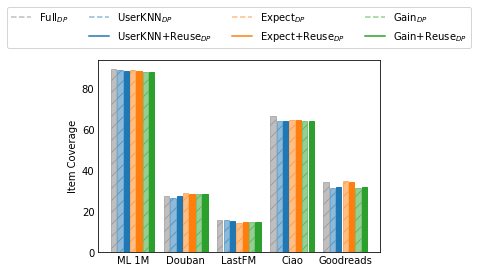

In [19]:
ml_coverage = item_coverage(ml1m_dp["recommendation_frequency"], ml1m_n_items)
douban_coverage = item_coverage(douban_dp["recommendation_frequency"], douban_n_items)
lfm_coverage = item_coverage(lfm_dp["recommendation_frequency"], lfm_n_items)
ciao_coverage = item_coverage(ciao_dp["recommendation_frequency"], ciao_n_items)
goodreads_coverage = item_coverage(goodreads_dp["recommendation_frequency"], goodreads_n_items)

full = [ml_coverage["userknn_full"], douban_coverage["userknn_full"], lfm_coverage["userknn_full"], ciao_coverage["userknn_full"], goodreads_coverage["userknn_full"]]
userknn = [ml_coverage["userknn"], douban_coverage["userknn"], lfm_coverage["userknn"], ciao_coverage["userknn"], goodreads_coverage["userknn"]]
userknn_reuse = [ml_coverage["userknn_reuse"], douban_coverage["userknn_reuse"], lfm_coverage["userknn_reuse"], ciao_coverage["userknn_reuse"], goodreads_coverage["userknn_reuse"]]
expect = [ml_coverage["expect"], douban_coverage["expect"], lfm_coverage["expect"], ciao_coverage["expect"], goodreads_coverage["expect"]]
expect_reuse = [ml_coverage["expect_reuse"], douban_coverage["expect_reuse"], lfm_coverage["expect_reuse"], ciao_coverage["expect_reuse"], goodreads_coverage["expect_reuse"]]
gain = [ml_coverage["gain"], douban_coverage["gain"], lfm_coverage["gain"], ciao_coverage["gain"], goodreads_coverage["gain"]]
gain_reuse = [ml_coverage["gain_reuse"], douban_coverage["gain_reuse"], lfm_coverage["gain_reuse"], ciao_coverage["gain_reuse"], goodreads_coverage["gain_reuse"]]

# width of the bars
barWidth = 0.1

# The x position of bars
n_datasets = 5
r1 = np.arange(n_datasets)
r2 = [x+0.02 + barWidth for x in r1]
r3 = [x+0.02 + barWidth for x in r2]
r4 = [x+0.02 + barWidth for x in r3]
r5 = [x+0.02 + barWidth for x in r4]
r6 = [x+0.02 + barWidth for x in r5]
r7 = [x+0.02 + barWidth for x in r6]

plt.bar(r1, full, width = barWidth, color = 'gray', edgecolor = 'gray', alpha=0.5, hatch='//')
plt.bar(r2, userknn, width = barWidth, color = 'C0', edgecolor = 'C0', alpha=0.5, hatch='//')
plt.bar(r3, userknn_reuse, width = barWidth, color = 'C0', edgecolor = 'C0')
plt.bar(r4, expect, width = barWidth, color = 'C1', edgecolor = 'C1', alpha=0.5, hatch='//')
plt.bar(r5, expect_reuse, width = barWidth, color = 'C1', edgecolor = 'C1')
plt.bar(r6, gain, width = barWidth, color = 'C2', edgecolor = 'C2', alpha=0.5, hatch='//')
plt.bar(r7, gain_reuse, width = barWidth, color = 'C2', edgecolor = 'C2')
 
# general layout
plt.xticks([r + barWidth*(3 + 0.6) for r in range(n_datasets)], ["ML 1M", "Douban", "LastFM", "Ciao", "Goodreads"])
plt.ylabel("Item Coverage")

colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    if c == "gray":
        lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
        lines.append(Line2D([0], [0], color="white", linestyle="solid"))
    else:
        lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
        lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = [r"Full$_{DP}$", "", r"UserKNN$_{DP}$", r"UserKNN+Reuse$_{DP}$", r"Expect$_{DP}$", r"Expect+Reuse$_{DP}$", r"Gain$_{DP}$", r"Gain+Reuse$_{DP}$"]

plt.legend(lines, labels, ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()

# Thresholds

In [20]:
k_idx = 1
print("=== MovieLens 1M === ")
t = np.load("results/unprotected/ml-1m/thresholds.npy")[k_idx]
t_dp = np.load("results/protected/ml-1m/thresholds.npy")[k_idx]
print("No DP: %.2f, DP: %.2f" % (t, t_dp))
print()

print("=== Douban === ")
t = np.load("results/unprotected/douban/thresholds.npy")[k_idx]
t_dp = np.load("results/protected/douban/thresholds.npy")[k_idx]
print("No DP: %.2f, DP: %.2f" % (t, t_dp))
print()

print("=== LastFM === ")
t = np.load("results/unprotected/lfm/thresholds.npy")[k_idx]
t_dp = np.load("results/protected/lfm/thresholds.npy")[k_idx]
print("No DP: %.2f, DP: %.2f" % (t, t_dp))
print()

print("=== Ciao === ")
t = np.load("results/unprotected/ciao/thresholds.npy")[k_idx]
t_dp = np.load("results/protected/ciao/thresholds.npy")[k_idx]
print("No DP: %.2f, DP: %.2f" % (t, t_dp))
print()

print("=== Goodreads === ")
t = np.load("results/unprotected/goodreads/thresholds.npy")[k_idx]
t_dp = np.load("results/protected/goodreads/thresholds.npy")[k_idx]
print("No DP: %.2f, DP: %.2f" % (t, t_dp))
print()

=== MovieLens 1M === 
No DP: 92.90, DP: 92.89

=== Douban === 
No DP: 91.53, DP: 91.54

=== LastFM === 
No DP: 105.62, DP: 104.32

=== Ciao === 
No DP: 95.18, DP: 95.79

=== Goodreads === 
No DP: 94.98, DP: 94.90



In [21]:
%matplotlib inline

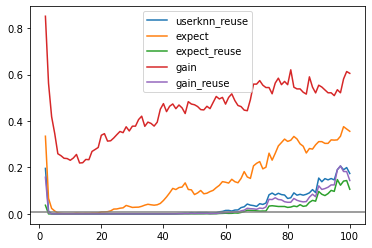

In [22]:
def plot_p_values_q(dataset_name, metric, h0="<"):
    significance_tests = pl.load(open("results/unprotected/" + dataset_name + "/significance_test_results.pkl", "rb"))

    plt.figure()
    for m in ["userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
        p_values = []
        for folds in range(len(significance_tests[m])):
            ps = [r["p"] for r in significance_tests[m][folds][metric][h0][0]]
            p_values.append(ps)
        plt.plot(range(len(ps)), np.amax(p_values, axis=0), label=m)
    plt.axhline(y=0.01, c="gray")
    plt.legend()
    
#plot_p_values_q("ml-1m", "avg_neighborhood_size_q")
#plot_p_values_q("douban", "avg_neighborhood_size_q")
#plot_p_values_q("lfm", "avg_neighborhood_size_q")
plot_p_values_q("ciao", "avg_neighborhood_size_q", h0="==")
#plot_p_values_q("goodreads", "avg_neighborhood_size_q")

In [23]:
%matplotlib qt
#plot_p_values_q("ml-1m", "avg_rating_overlap_q", h0=">")
#plot_p_values_q("douban", "avg_rating_overlap_q", h0=">")
#plot_p_values_q("lfm", "avg_rating_overlap_q", h0=">")
plot_p_values_q("ciao", "avg_rating_overlap_q", h0=">")
#plot_p_values_q("goodreads", "avg_rating_overlap_q", h0=">")

In [24]:
def print_p_values(dataset_name, metric, h0="<", k_idx=1):
    significance_tests = pl.load(open("results/unprotected/" + dataset_name + "/significance_test_results.pkl", "rb"))
    
    for m in ["userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
        p_values = []
        for fold in range(len(significance_tests[m])):
            p = significance_tests[m][fold][metric][h0][k_idx]["p"]
            p_values.append(p)
        
        print("%s: %f" % (m, np.max(p_values)))

print("=== MovieLens 1M ===")
print_p_values("ml-1m", "mean_absolute_error", h0="<")
print()
print("=== Douban ===")
print_p_values("douban", "mean_absolute_error", h0="<")
print()
print("=== LastFM ===")
print_p_values("lfm", "mean_absolute_error", h0="<")
print()
print("=== Ciao ===")
print_p_values("ciao", "mean_absolute_error", h0="<")
print()
print("=== Goodreads ===")
print_p_values("goodreads", "mean_absolute_error", h0="<")
print()

=== MovieLens 1M ===
userknn_reuse: 0.000000
expect: 0.000000
expect_reuse: 0.000000
gain: 0.000000
gain_reuse: 0.000000

=== Douban ===
userknn_reuse: 0.000000
expect: 0.000000
expect_reuse: 0.000000
gain: 0.000000
gain_reuse: 0.000000

=== LastFM ===
userknn_reuse: 0.105935
expect: 0.000000
expect_reuse: 0.000000
gain: 0.000000
gain_reuse: 0.000000

=== Ciao ===
userknn_reuse: 0.528752
expect: 0.752441
expect_reuse: 0.747713
gain: 0.292931
gain_reuse: 0.371665

=== Goodreads ===
userknn_reuse: 0.000015
expect: 1.000000
expect_reuse: 0.326339
gain: 0.000000
gain_reuse: 0.000000



In [25]:
print_p_values("ciao", "mean_absolute_error", h0="==")

userknn_reuse: 0.996814
expect: 0.931973
expect_reuse: 0.924168
gain: 0.585861
gain_reuse: 0.743330


In [26]:
def print_p_values_dp(dataset_name, metric, h0="<", k_idx=1):
    significance_tests = pl.load(open("results/protected/" + dataset_name + "/significance_test_results.pkl", "rb"))
    
    for m in ["userknn_no", "userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
        p_values = []
        for fold in range(len(significance_tests[m])):
            p = significance_tests[m][fold][metric][h0][k_idx]["p"]
            p_values.append(p)

        print("%s: %f" % (m, np.max(p_values)))

h0 = "<"
print("=== MovieLens 1M ===")
print_p_values_dp("ml-1m", "mean_absolute_error", h0=h0)
print()
print("=== Douban ===")
print_p_values_dp("douban", "mean_absolute_error", h0=h0)
print()
print("=== LastFM ===")
print_p_values_dp("lfm", "mean_absolute_error", h0=h0)
print()
print("=== Ciao ===")
print_p_values_dp("ciao", "mean_absolute_error", h0=h0)
print()
print("=== Goodreads ===")
print_p_values_dp("goodreads", "mean_absolute_error", h0=h0)
print()

=== MovieLens 1M ===
userknn_no: 0.000000
userknn_full: 1.000000
userknn_reuse: 0.000000
expect: 0.000000
expect_reuse: 0.000000
gain: 0.000000
gain_reuse: 0.000000

=== Douban ===
userknn_no: 0.000000
userknn_full: 0.999679
userknn_reuse: 0.185660
expect: 0.934331
expect_reuse: 0.934123
gain: 0.542544
gain_reuse: 0.807370

=== LastFM ===
userknn_no: 0.000000
userknn_full: 1.000000
userknn_reuse: 0.070222
expect: 0.000000
expect_reuse: 0.000000
gain: 0.000000
gain_reuse: 0.000000

=== Ciao ===
userknn_no: 0.000000
userknn_full: 1.000000
userknn_reuse: 0.810711
expect: 0.999992
expect_reuse: 0.999998
gain: 0.667734
gain_reuse: 0.810062

=== Goodreads ===
userknn_no: 0.000000
userknn_full: 1.000000
userknn_reuse: 0.044365
expect: 1.000000
expect_reuse: 1.000000
gain: 0.000000
gain_reuse: 0.000000



In [27]:
print("=== Douban ===")
print_p_values_dp("douban", "mean_absolute_error", h0="==")
print()
print("=== LastFM ===")
print_p_values_dp("lfm", "mean_absolute_error", h0="==")
print()
print("=== Ciao ===")
print_p_values_dp("ciao", "mean_absolute_error", h0="==")
print()
print("=== Goodreads ===")
print_p_values_dp("goodreads", "mean_absolute_error", h0="==")
print()

=== Douban ===
userknn_no: 0.000000
userknn_full: 0.011981
userknn_reuse: 0.371319
expect: 0.938987
expect_reuse: 0.898755
gain: 0.914912
gain_reuse: 0.867484

=== LastFM ===
userknn_no: 0.000000
userknn_full: 0.000000
userknn_reuse: 0.140443
expect: 0.000000
expect_reuse: 0.000000
gain: 0.000000
gain_reuse: 0.000000

=== Ciao ===
userknn_no: 0.000000
userknn_full: 0.000000
userknn_reuse: 0.924397
expect: 0.000895
expect_reuse: 0.002498
gain: 0.830689
gain_reuse: 0.996843

=== Goodreads ===
userknn_no: 0.000000
userknn_full: 0.000000
userknn_reuse: 0.088731
expect: 0.000000
expect_reuse: 0.000000
gain: 0.000000
gain_reuse: 0.000000



In [28]:
print("=== Ciao ===")
print_p_values_dp("ciao", "mean_absolute_error", h0=">")

=== Ciao ===
userknn_no: 1.000000
userknn_full: 0.000000
userknn_reuse: 0.462199
expect: 0.000448
expect_reuse: 0.001249
gain: 0.763087
gain_reuse: 0.498421


In [29]:
significance_tests = pl.load(open("results/protected/douban_modified/significance_test_results_full.pkl", "rb"))
k_idx = 1
    
for m in ["userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
    p_values = []
    for fold in range(len(significance_tests[m])):
        p = significance_tests[m][fold]["mean_absolute_error"]["<"][k_idx]["p"]
        p_values.append(p)
        
    print("%s: %f" % (m, np.max(p_values)))

IndexError: list index out of range

In [ ]:
for m in ["expect", "expect_reuse"]:
    for fold in range(len(significance_tests[m])):
        p = significance_tests["expect"][fold]["mean_absolute_error"]["=="][1]["p"]
        p_values.append(p)

    print("%s: %f" % (m, np.max(p_values)))

In [ ]:
print("=== MovieLens 1M ===")
print_p_values_dp("ml-1m", "privacy_risk_dp", h0="<")
print()
print("=== Douban ===")
print_p_values_dp("douban", "privacy_risk_dp", h0="<")
print()
print("=== LastFM ===")
print_p_values_dp("lfm", "privacy_risk_dp", h0="<")
print()
print("=== Ciao ===")
print_p_values_dp("ciao", "privacy_risk_dp", h0="<")
print()
print("=== Goodreads ===")
print_p_values_dp("goodreads", "privacy_risk_dp", h0="<")
print()

In [ ]:
print("=== MovieLens 1M ===")
print_p_values_dp("ml-1m", "privacy_risk_dp_secures", h0="<")
print()
print("=== Douban ===")
print_p_values_dp("douban", "privacy_risk_dp_secures", h0="<")
print()
print("=== LastFM ===")
print_p_values_dp("lfm", "privacy_risk_dp_secures", h0="<")
print()
print("=== Ciao ===")
print_p_values_dp("ciao", "privacy_risk_dp_secures", h0="<")
print()
print("=== Goodreads ===")
print_p_values_dp("goodreads", "privacy_risk_dp_secures", h0="<")
print()

In [ ]:
def print_p_values_dp(metric, h0="<", k_idx=1):
    significance_tests = pl.load(open("results/protected/lfm_modified/significance_test_results.pkl", "rb"))
    
    for m in ["userknn_no", "userknn_full", "userknn_reuse", "expect", "expect_reuse", "gain", "gain_reuse"]:
        p_values = []
        for fold in range(len(significance_tests[m])):
            p = significance_tests[m][fold][metric][h0][k_idx]["p"]
            p_values.append(p)

        print("%s: %f" % (m, np.max(p_values)))
print_p_values_dp("privacy_risk_dp_secures", h0="==")

In [ ]:
dp = pl.load(open("results/protected/ciao/significance_test_results.pkl", "rb"))
for f in range(5):
    print(dp["expect"][f]["privacy_risk_dp"]["<"][1])

# Percentile Plot of Datasets

In [ ]:
ml_df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"])
douban_df = pd.read_csv("data/douban/douban.csv", sep=";", names=["user_id", "item_id", "rating"])
lfm_df = pd.read_csv("data/lfm/artist_ratings.csv", sep=";", names=["user_id", "item_id", "rating"])
ciao_df = pd.read_csv("data/ciao/ciao.csv", sep=";", names=["user_id", "item_id", "rating"])
goodreads_df = pd.read_csv("data/goodreads/sample.csv", sep=";", names=["user_id", "item_id", "rating"])

In [ ]:
profile_size_ml = ml_df.groupby("user_id").size()
profile_size_douban = douban_df.groupby("user_id").size()
profile_size_lfm = lfm_df.groupby("user_id").size()
profile_size_ciao = ciao_df.groupby("user_id").size()
profile_size_goodreads = goodreads_df.groupby("user_id").size()

In [ ]:
rel_profile_size_ml = ml_df.groupby("user_id").size() / len(ml_df)
rel_profile_size_douban = douban_df.groupby("user_id").size() / len(douban_df)
rel_profile_size_lfm = lfm_df.groupby("user_id").size() / len(lfm_df)
rel_profile_size_ciao = ciao_df.groupby("user_id").size() / len(ciao_df)
rel_profile_size_goodreads = goodreads_df.groupby("user_id").size() / len(goodreads_df)

In [ ]:
%matplotlib inline
percentiles = defaultdict(list)
for p in np.arange(0, 100, 1):
    percentiles["ml"].append(np.percentile(rel_profile_size_ml, p))
    percentiles["douban"].append(np.percentile(rel_profile_size_douban, p))
    percentiles["lfm"].append(np.percentile(rel_profile_size_lfm, p))
    percentiles["ciao"].append(np.percentile(rel_profile_size_ciao, p))
    percentiles["goodreads"].append(np.percentile(rel_profile_size_goodreads, p))

plt.plot(percentiles["ml"], label="MovieLens 1M", c="C3")
plt.plot(percentiles["douban"], label="Douban", c="C5")
plt.plot(percentiles["lfm"], label="LastFM", c="C6")
plt.plot(percentiles["ciao"], label="Ciao", c="C8")
plt.plot(percentiles["goodreads"], label="Goodreads", c="C9")
plt.legend()

plt.xlabel("User Percentile")
plt.ylabel("Relative Profile Size")
plt.tight_layout()

In [ ]:
f = 0.05

n = np.round(len(rel_profile_size_ml) * f).astype(int)
v = rel_profile_size_ml.sort_values(ascending=False).head(n).mean()
print("MovieLens 1M: %f" % (v))

n = np.round(len(rel_profile_size_douban) * f).astype(int)
v = rel_profile_size_douban.sort_values(ascending=False).head(n).mean()
print("Douban: %f" % (v))

n = np.round(len(rel_profile_size_lfm) * f).astype(int)
v = rel_profile_size_lfm.sort_values(ascending=False).head(n).mean()
print("LastFM: %f" % (v))

n = np.round(len(rel_profile_size_ciao) * f).astype(int)
v = rel_profile_size_ciao.sort_values(ascending=False).head(n).mean()
print("Ciao: %f" % (v))

n = np.round(len(rel_profile_size_goodreads) * f).astype(int)
v = rel_profile_size_goodreads.sort_values(ascending=False).head(n).mean()
print("Goodreads: %f" % (v))

In [ ]:
f = 0.01

n = np.round(len(rel_profile_size_ml) * f).astype(int)
v = profile_size_ml.sort_values(ascending=False)[:n].mean() / profile_size_ml.mean()
print("MovieLens 1M: %f" % (v))

n = np.round(len(rel_profile_size_douban) * f).astype(int)
v = profile_size_douban.sort_values(ascending=False)[:n].mean() / profile_size_douban.mean()
print("Douban: %f" % (v))

n = np.round(len(rel_profile_size_lfm) * f).astype(int)
v = profile_size_ciao.sort_values(ascending=False)[:n].mean() / profile_size_ciao.mean()
print("LastFM: %f" % (v))

n = np.round(len(rel_profile_size_ciao) * f).astype(int)
v = profile_size_ciao.sort_values(ascending=False)[:n].mean() / profile_size_ciao.mean()
print("Ciao: %f" % (v))

n = np.round(len(rel_profile_size_goodreads) * f).astype(int)
v = profile_size_goodreads.sort_values(ascending=False)[:n].mean() / profile_size_goodreads.mean()
print("Goodreads: %f" % (v))

In [30]:
%matplotlib inline

In [79]:
%matplotlib qt

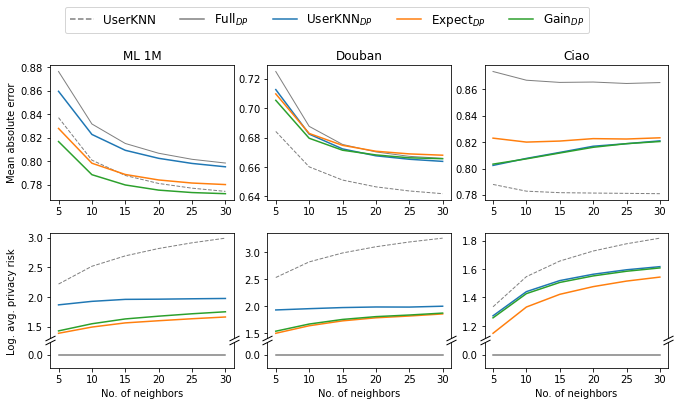

In [65]:
def plot1(ax, data, K): 
    ax.plot(K, data["userknn_full"], color="gray", linestyle="solid", linewidth=1)
    ax.plot(K, data["userknn_no"], color="gray", linestyle="dashed", linewidth=1)
    ax.plot(K, data["userknn"], color="C0", linestyle="solid", alpha=1)
    ax.plot(K, data["expect"], color="C1", linestyle="solid", alpha=1)
    ax.plot(K, data["gain"], color="C2", linestyle="solid", alpha=1)   
    
    return ax
    
def plot2(ax, data, K): 
    def split_axis(ax):
        divider = make_axes_locatable(ax)
        ax_top = divider.new_vertical(size="400%", pad=0.05)
        
        fig.add_axes(ax_top)
        ax.spines['top'].set_visible(False)
        ax_top.tick_params(bottom=False, labelbottom=False)
        ax_top.spines['bottom'].set_visible(False)
        
        ax_top.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        d = .5
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
        ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)
        ax.set_yticks([0.0])
        
        return ax_top, ax
    
    ax_top, ax_bottom = split_axis(ax)
    ax_top.plot(K, np.log10(data["userknn"]), color="C0", linestyle="solid", alpha=1)
    ax_top.plot(K, np.log10(data["expect"]), color="C1", linestyle="solid", alpha=1)
    ax_top.plot(K, np.log10(data["gain"]), color="C2", linestyle="solid", alpha=1)
    ax_top.plot(K, np.log10(data["userknn_no"]), color="gray", linestyle="dashed", alpha=1, linewidth=1)
    ax_bottom.plot(K, data["userknn_full"], color="gray", linestyle="solid", alpha=1)
    
    return ax_top, ax_bottom

fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, fig=fig)
ax4 = plt.subplot2grid((2,6), (1,0), colspan=2, fig=fig)
ax5 = plt.subplot2grid((2,6), (1,2), colspan=2, fig=fig)
ax6 = plt.subplot2grid((2,6), (1,4), colspan=2, fig=fig)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]


ax = fig.add_subplot(211, frameon=False)
ax.set_ylabel("Mean absolute error", labelpad=10)
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax = fig.add_subplot(234, frameon=False)
ax.set_ylabel("Log. avg. privacy risk", labelpad=10)
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)

ax1 = plot1(axes[0], ml1m_dp["mae"], K=ml1m_dp["K"])
ax2 = plot1(axes[1], douban_dp["mae"], K=douban_dp["K"])
ax3 = plot1(axes[2], ciao_dp["mae"], K=ciao_dp["K"])

#ax1.set_xlabel("Nr. of neighbors")
#ax2.set_xlabel("Nr. of neighbors")
#ax3.set_xlabel("Nr. of neighbors")

ax4_top, ax4_bottom = plot2(axes[3], ml1m_dp["privacy_risk_dp"], K=ml1m_dp["K"])
ax5_top, ax5_bottom = plot2(axes[4], douban_dp["privacy_risk_dp"], K=douban_dp["K"])
ax6_top, ax6_bottom = plot2(axes[5], ciao_dp["privacy_risk_dp"], K=ciao_dp["K"])

ax4_bottom.set_xlabel("No. of neighbors")
ax5_bottom.set_xlabel("No. of neighbors")
ax6_bottom.set_xlabel("No. of neighbors")

ax1.set_title("ML 1M")
ax2.set_title("Douban")
ax3.set_title("Ciao")



colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    #lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
lines = [Line2D([0], [0], color="gray", linestyle="dashed")] + lines
labels = ["UserKNN", r"Full$_{DP}$", r"UserKNN$_{DP}$", r"Expect$_{DP}$", r"Gain$_{DP}$"]

fig.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, .95), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.25, wspace=0.45)
fig.align_ylabels(axes)

In [72]:
print(ml1m_dp["mae"]["userknn_no"] / ml1m_dp["mae"]["userknn_no"])
print(ml1m_dp["mae"]["userknn"] / ml1m_dp["mae"]["userknn_no"])
print(ml1m_dp["mae"]["userknn_full"] / ml1m_dp["mae"]["userknn_no"])
print(ml1m_dp["mae"]["userknn_reuse"] / ml1m_dp["mae"]["userknn_no"])
print(ml1m_dp["mae"]["expect"] / ml1m_dp["mae"]["userknn_no"])
print(ml1m_dp["mae"]["expect_reuse"] / ml1m_dp["mae"]["userknn_no"])
print(ml1m_dp["mae"]["gain"] / ml1m_dp["mae"]["userknn_no"])
print(ml1m_dp["mae"]["gain_reuse"] / ml1m_dp["mae"]["userknn_no"])

[1. 1. 1. 1. 1. 1.]
[1.02681957 1.02738864 1.02725829 1.02745729 1.02715999 1.02708653]
[1.04700776 1.03853252 1.03466474 1.03301013 1.03169208 1.03121961]
[1.00518974 1.00927499 1.01065186 1.0121198  1.01298987 1.01415752]
[0.98898883 0.99673844 1.00107151 1.00382559 1.00563545 1.00750136]
[0.98643864 0.9944075  0.99905456 1.00238705 1.00503998 1.00669099]
[0.97561024 0.98451664 0.98972668 0.99273208 0.99517776 0.99744533]
[0.97614867 0.98622657 0.99077963 0.99489235 0.99748737 1.00022439]


In [73]:
print(douban_dp["mae"]["userknn_no"] / douban_dp["mae"]["userknn_no"])
print(douban_dp["mae"]["userknn"] / douban_dp["mae"]["userknn_no"])
print(douban_dp["mae"]["userknn_full"] / douban_dp["mae"]["userknn_no"])
print(douban_dp["mae"]["userknn_reuse"] / douban_dp["mae"]["userknn_no"])
print(douban_dp["mae"]["expect"] / douban_dp["mae"]["userknn_no"])
print(douban_dp["mae"]["expect_reuse"] / douban_dp["mae"]["userknn_no"])
print(douban_dp["mae"]["gain"] / douban_dp["mae"]["userknn_no"])
print(douban_dp["mae"]["gain_reuse"] / douban_dp["mae"]["userknn_no"])

[1. 1. 1. 1. 1. 1.]
[1.04161998 1.03377027 1.03256125 1.03268084 1.03351094 1.03425575]
[1.05960698 1.04173145 1.03721824 1.0367919  1.03658021 1.03747378]
[1.02945585 1.02950231 1.0317668  1.03392777 1.03591096 1.03724387]
[1.03733063 1.03442315 1.03626159 1.03748968 1.03918027 1.04079777]
[1.0365323  1.03445907 1.03608123 1.03881045 1.04019725 1.04099705]
[1.0309604  1.02948184 1.03117597 1.03360748 1.03505368 1.03707019]
[1.03365375 1.03118432 1.03380187 1.03599298 1.0375338  1.03934427]
